In [1]:
# STEP 1: INSTALL AND IMPORT LIBRARIES
# Run this cell first by clicking the play button or pressing Shift+Enter

# Install required packages (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn -q

# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For reproducibility
np.random.seed(42)

print("✅ Setup complete! All libraries imported successfully.")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ Setup complete! All libraries imported successfully.
NumPy version: 2.0.2
Pandas version: 2.2.2


In [2]:
# STEP 2: LOAD THE IRIS DATASET
# This dataset comes built-in with scikit-learn, no need to download from Kaggle

iris = load_iris()
print("✅ Iris dataset loaded successfully!")
print(f"\n📊 Dataset contains:")
print(f"   - {iris.data.shape[0]} samples")
print(f"   - {iris.data.shape[1]} features")
print(f"   - {len(iris.target_names)} classes")
print(f"\n🌺 Flower types: {list(iris.target_names)}")
print(f"📈 Features: {iris.feature_names}")

✅ Iris dataset loaded successfully!

📊 Dataset contains:
   - 150 samples
   - 4 features
   - 3 classes

🌺 Flower types: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
📈 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


STEP 3: EXPLORATORY DATA ANALYSIS

📋 BASIC DATASET INFO:
Shape: (150, 6) (rows, columns)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

📊 DATASET STATISTICS:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866     

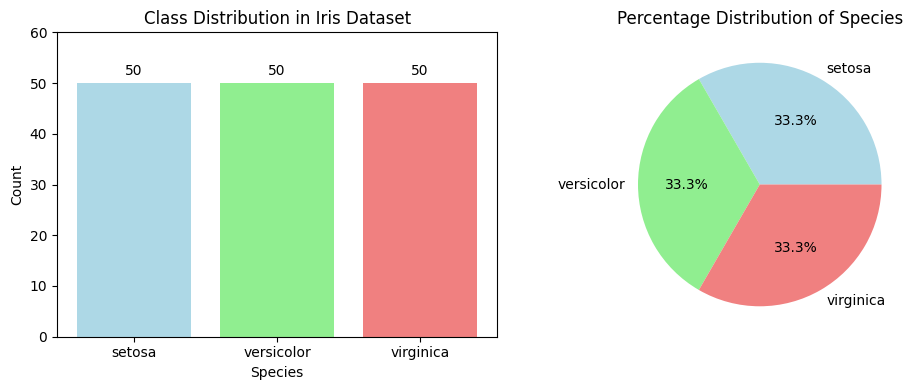


📈 FEATURE DISTRIBUTION BY SPECIES:


/tmp/ipython-input-2104561882.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(box_data, labels=iris.target_names)
/tmp/ipython-input-2104561882.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(box_data, labels=iris.target_names)
/tmp/ipython-input-2104561882.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(box_data, labels=iris.target_names)
/tmp/ipython-input-2104561882.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in

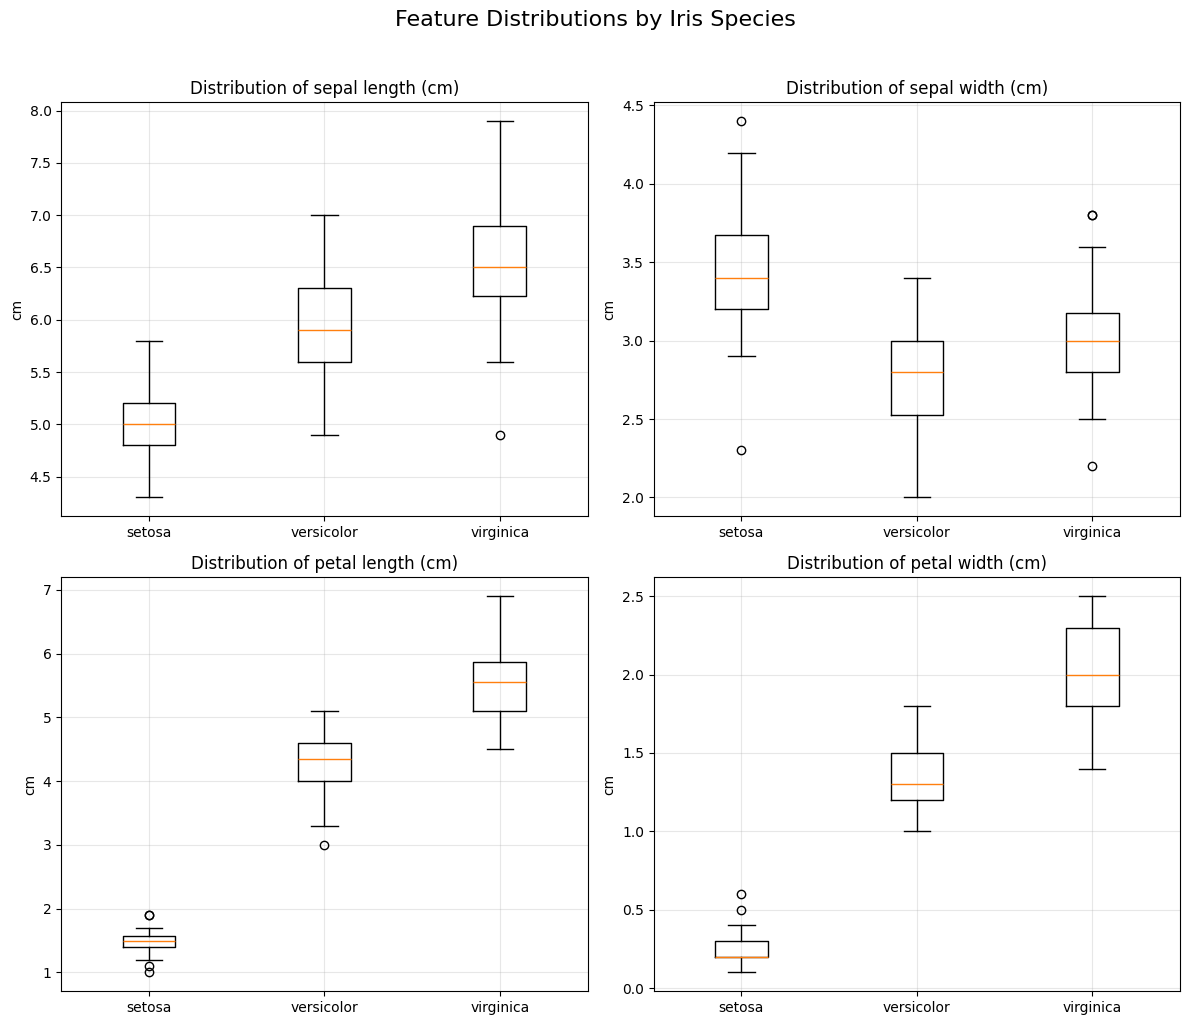


🔗 RELATIONSHIPS BETWEEN FEATURES:


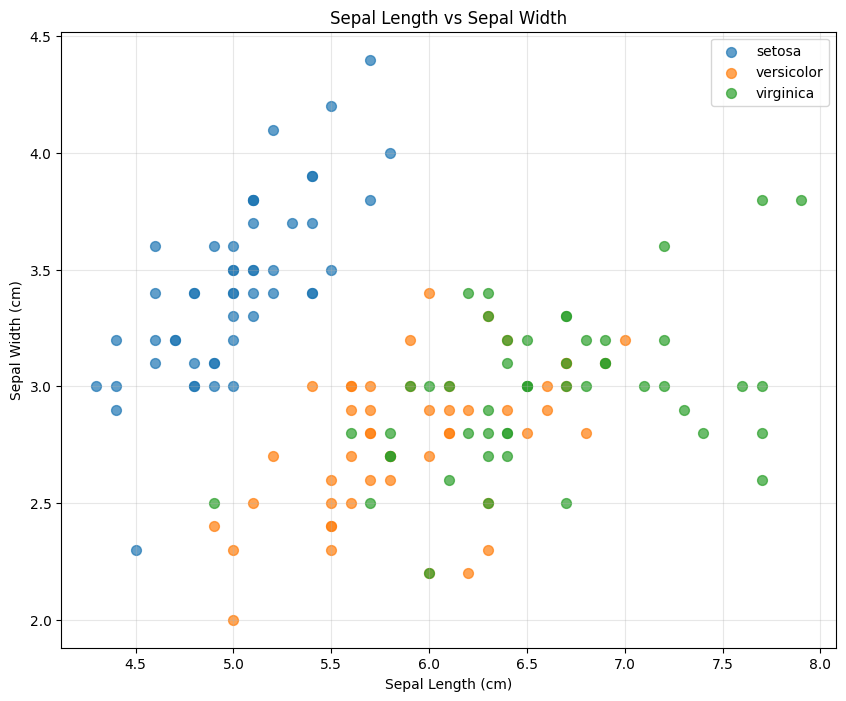


🔥 FEATURE CORRELATION HEATMAP:


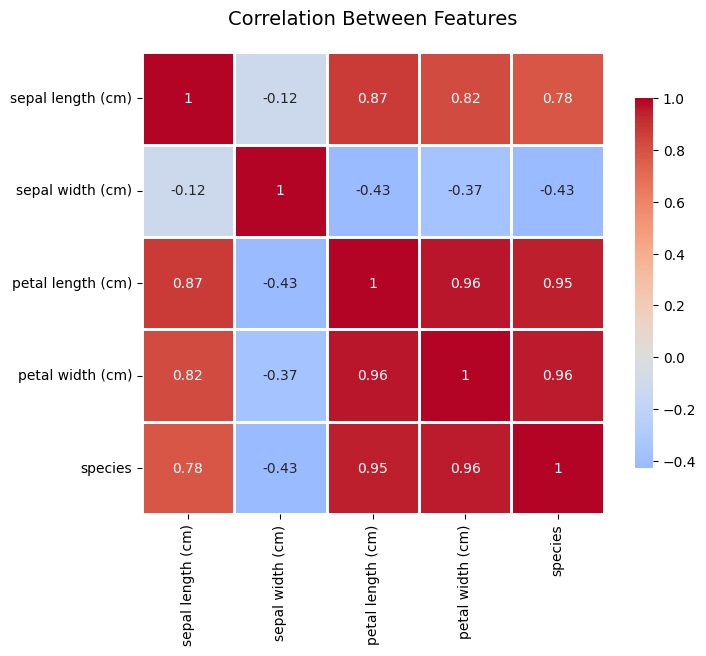


KEY INSIGHTS FROM EDA:
1. ✅ Balanced dataset: 50 samples per class
2. ✅ No missing values (clean dataset)
3. 📏 Feature ranges:
   - Sepal Length: 4.3 to 7.9 cm
   - Sepal Width: 2.0 to 4.4 cm
   - Petal Length: 1.0 to 6.9 cm
   - Petal Width: 0.1 to 2.5 cm
4. 🔥 Strong correlation between petal features (0.96)
5. 🎯 Setosa is clearly separable from other species
6. 📈 Versicolor and Virginica have some overlap

✅ EDA Complete! Ready for data preprocessing...


In [3]:
# STEP 3: EXPLORE AND VISUALIZE THE DATA
print("="*50)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*50)

# Create a DataFrame for easier manipulation
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 3.1 Basic Dataset Information
print("\n📋 BASIC DATASET INFO:")
print(f"Shape: {iris_df.shape} (rows, columns)")
print(f"\nFirst 5 rows:")
print(iris_df.head())

print(f"\n📊 DATASET STATISTICS:")
print(iris_df.describe())

print(f"\n🎯 CLASS DISTRIBUTION:")
class_counts = iris_df['species_name'].value_counts()
print(class_counts)

# 3.2 Simple Visualization 1: Class Distribution
plt.figure(figsize=(10, 4))

# Subplot 1: Bar chart of class distribution
plt.subplot(1, 2, 1)
bars = plt.bar(class_counts.index, class_counts.values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Class Distribution in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.ylim(0, 60)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage Distribution of Species')

plt.tight_layout()
plt.show()

# 3.3 Feature Distribution by Species
print("\n📈 FEATURE DISTRIBUTION BY SPECIES:")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = iris.feature_names

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2

    # Create boxplot for each feature
    box_data = [iris_df[iris_df['species_name'] == species][feature]
                for species in iris.target_names]

    axes[row, col].boxplot(box_data, labels=iris.target_names)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_ylabel('cm')
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions by Iris Species', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 3.4 Simple Pairplot (Scatter Matrix)
print("\n🔗 RELATIONSHIPS BETWEEN FEATURES:")
plt.figure(figsize=(10, 8))

# Create scatter plots for sepal and petal dimensions
for i, target_name in enumerate(iris.target_names):
    subset = iris_df[iris_df['species_name'] == target_name]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                label=target_name, alpha=0.7, s=50)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3.5 Correlation Heatmap
print("\n🔥 FEATURE CORRELATION HEATMAP:")
# Select only numeric columns for correlation
numeric_df = iris_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Features', fontsize=14, pad=20)
plt.show()

# 3.6 Key Insights Summary
print("\n" + "="*50)
print("KEY INSIGHTS FROM EDA:")
print("="*50)
print("1. ✅ Balanced dataset: 50 samples per class")
print("2. ✅ No missing values (clean dataset)")
print("3. 📏 Feature ranges:")
print("   - Sepal Length: 4.3 to 7.9 cm")
print("   - Sepal Width: 2.0 to 4.4 cm")
print("   - Petal Length: 1.0 to 6.9 cm")
print("   - Petal Width: 0.1 to 2.5 cm")
print("4. 🔥 Strong correlation between petal features (0.96)")
print("5. 🎯 Setosa is clearly separable from other species")
print("6. 📈 Versicolor and Virginica have some overlap")
print("="*50)

# Store the processed dataframe for next steps
print("\n✅ EDA Complete! Ready for data preprocessing...")

STEP 4: DATA PREPROCESSING

🔧 SEPARATING FEATURES AND TARGET...
Features shape (X): (150, 4)
Target shape (y): (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

📊 SPLITTING DATA INTO TRAIN/TEST SETS...
Training set size: 120 samples (80.0%)
Test set size: 30 samples (20.0%)
Number of features: 4

📈 CLASS DISTRIBUTION IN SPLITS:
Training set:
  setosa: 40 samples (33.3%)
  versicolor: 40 samples (33.3%)
  virginica: 40 samples (33.3%)

Test set:
  setosa: 10 samples (33.3%)
  versicolor: 10 samples (33.3%)
  virginica: 10 samples (33.3%)

⚖️ SCALING FEATURES...

Before scaling (first 3 samples):
Training data:
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]]

Test data:
[[4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 2.4 3.3 1. ]]

✅ After scaling (first 3 samples):
Training data (scaled):
[[-1.7216 -0.3321 -1.3457 -1.3233]
 [-1.1245 -1.2277  0.4145  0.6518]
 [ 1.1444 -0.556 

/tmp/ipython-input-2246237274.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train, labels=iris.feature_names)
/tmp/ipython-input-2246237274.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train_scaled, labels=iris.feature_names)


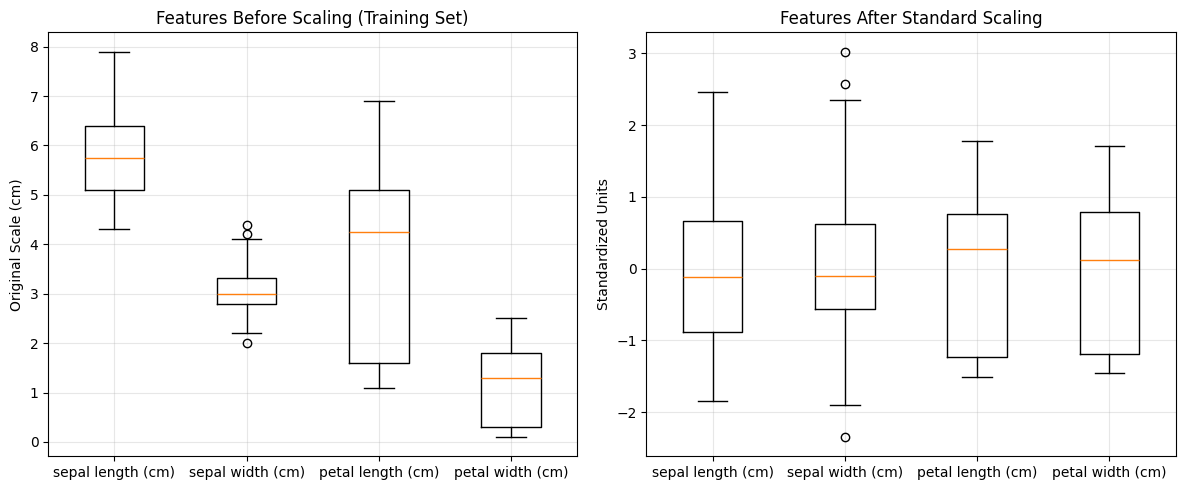


WHY SCALING IS CRITICAL FOR KNN:
1. 📏 KNN uses distance metrics (Euclidean distance)
2. ⚠️ Features on different scales dominate distance calculations
3. 📐 Example without scaling:
   - Sepal length range: 4.3-7.9 cm (range ~3.6)
   - Petal width range: 0.1-2.5 cm (range ~2.4)
   → Sepal length would have more influence!
4. ✅ With StandardScaler:
   - All features have mean=0, std=1
   - Equal contribution to distance calculation

✅ DATA PREPROCESSING COMPLETE!
Data ready for KNN modeling:
  X_train_scaled: (120, 4)
  X_test_scaled: (30, 4)
  y_train: (120,)
  y_test: (30,)

📋 DATA SPLIT SUMMARY:
 Dataset  Samples  Features  Classes
Original      150         4        3
Training      120         4        3
 Testing       30         4        3


In [4]:
# STEP 4: DATA PREPROCESSING AND SPLITTING
print("="*50)
print("STEP 4: DATA PREPROCESSING")
print("="*50)

# 4.1 Separate features (X) and target (y)
print("\n🔧 SEPARATING FEATURES AND TARGET...")
X = iris_df.drop(['species', 'species_name'], axis=1).values  # Features (all 4 columns)
y = iris_df['species'].values  # Target (0, 1, 2)

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")

# 4.2 Split into training and testing sets
print("\n📊 SPLITTING DATA INTO TRAIN/TEST SETS...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class distribution in splits
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

# 4.3 Check class distribution in train/test sets
print("\n📈 CLASS DISTRIBUTION IN SPLITS:")
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

print("Training set:")
for i, species in enumerate(iris.target_names):
    print(f"  {species}: {train_counts[i]} samples ({train_counts[i]/len(y_train)*100:.1f}%)")

print("\nTest set:")
for i, species in enumerate(iris.target_names):
    print(f"  {species}: {test_counts[i]} samples ({test_counts[i]/len(y_test)*100:.1f}%)")

# 4.4 Feature Scaling (Important for KNN!)
print("\n⚖️ SCALING FEATURES...")
scaler = StandardScaler()

print("\nBefore scaling (first 3 samples):")
print("Training data:")
print(X_train[:3])

print("\nTest data:")
print(X_test[:3])

# Fit scaler on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ After scaling (first 3 samples):")
print("Training data (scaled):")
print(X_train_scaled[:3].round(4))

print("\nTest data (scaled):")
print(X_test_scaled[:3].round(4))

# 4.5 Verify scaling statistics
print("\n📊 SCALING STATISTICS VERIFICATION:")
print("Training set (scaled):")
print(f"  Mean of each feature: {X_train_scaled.mean(axis=0).round(4)}")
print(f"  Std of each feature: {X_train_scaled.std(axis=0).round(4)}")

print("\nTest set (scaled):")
print(f"  Mean of each feature: {X_test_scaled.mean(axis=0).round(4)}")
print(f"  Std of each feature: {X_test_scaled.std(axis=0).round(4)}")

# 4.6 Visualize the effect of scaling
plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
plt.boxplot(X_train, labels=iris.feature_names)
plt.title('Features Before Scaling (Training Set)')
plt.ylabel('Original Scale (cm)')
plt.grid(True, alpha=0.3)

# After scaling
plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled, labels=iris.feature_names)
plt.title('Features After Standard Scaling')
plt.ylabel('Standardized Units')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.7 Why scaling is important for KNN
print("\n" + "="*50)
print("WHY SCALING IS CRITICAL FOR KNN:")
print("="*50)
print("1. 📏 KNN uses distance metrics (Euclidean distance)")
print("2. ⚠️ Features on different scales dominate distance calculations")
print("3. 📐 Example without scaling:")
print("   - Sepal length range: 4.3-7.9 cm (range ~3.6)")
print("   - Petal width range: 0.1-2.5 cm (range ~2.4)")
print("   → Sepal length would have more influence!")
print("4. ✅ With StandardScaler:")
print("   - All features have mean=0, std=1")
print("   - Equal contribution to distance calculation")
print("="*50)

# 4.8 Save prepared data for modeling
print("\n✅ DATA PREPROCESSING COMPLETE!")
print("Data ready for KNN modeling:")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  X_test_scaled: {X_test_scaled.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

# Create a summary dataframe
data_summary = pd.DataFrame({
    'Dataset': ['Original', 'Training', 'Testing'],
    'Samples': [len(X), len(X_train), len(X_test)],
    'Features': [X.shape[1], X_train.shape[1], X_test.shape[1]],
    'Classes': [len(np.unique(y)), len(np.unique(y_train)), len(np.unique(y_test))]
})

print("\n📋 DATA SPLIT SUMMARY:")
print(data_summary.to_string(index=False))

STEP 5: CLASSIC K-NEAREST NEIGHBORS IMPLEMENTATION

🚀 TRAINING CLASSIC KNN...
✅ ClassicKNN initialized with k=3
✅ Training data stored: 120 samples

🎯 MAKING PREDICTIONS...
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0), np.int64(0), np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.6416  0.7834]
    Neighbors' labels: [np.int64(2), np.int64(2), np.int64(1)]
    Prediction: virginica (2)

  Sample 3:
    Test point: [-1.1245 -1.4515 -0.2669 -0.2699]
    Neighbors' labels: [np.int64(1), np.int64(1), np.int64(1)]
    Prediction: versicolor (1)

📊 EVALUATING PERFORMANCE...
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0), np.int64(0), np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.6416  0.7834]
    Neighbors' labels: [np.int64(2), np.int64(2), np

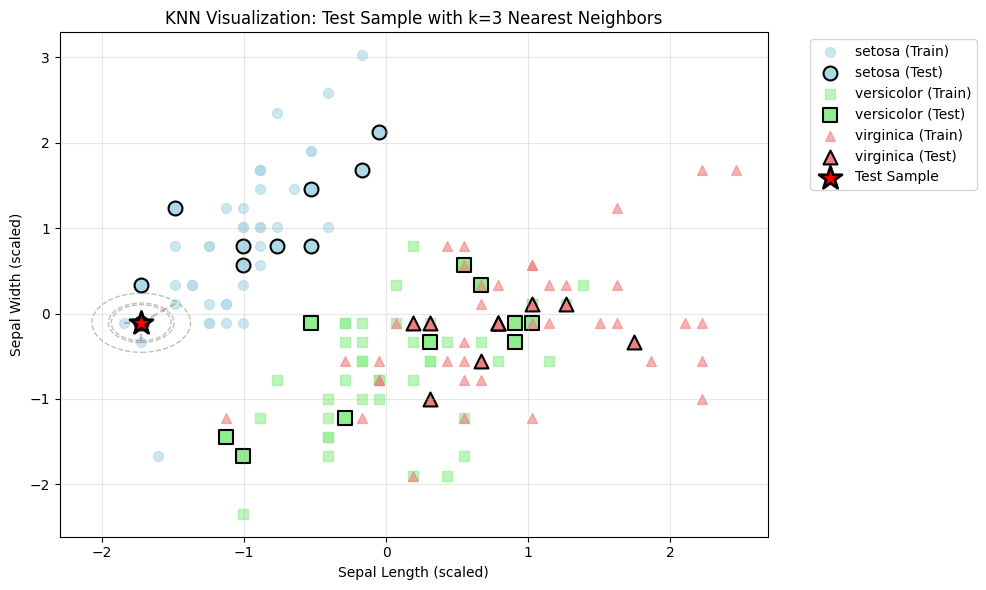


CLASSIC KNN IMPLEMENTATION SUMMARY
✅ Accuracy: 0.9333
✅ Correct predictions: 28/30
✅ K value used: 3
✅ Training samples: 120
✅ Test samples: 30

📝 How Classic KNN works:
1. 🏋️ 'Lazy learning': Stores all training data
2. 📏 Calculates distance to all training points
3. 🔍 Finds k nearest neighbors
4. 🗳️ Takes majority vote of neighbors' labels
5. 🏷️ Assigns the most common label as prediction

✅ CLASSIC KNN IMPLEMENTATION COMPLETE!
Next: Fast KNN implementation using scikit-learn...


In [6]:
# STEP 5: CLASSIC KNN IMPLEMENTATION (FROM SCRATCH)
print("="*50)
print("STEP 5: CLASSIC K-NEAREST NEIGHBORS IMPLEMENTATION")
print("="*50)

class ClassicKNN:
    """
    Simple K-Nearest Neighbors classifier implemented from scratch
    Educational version - not optimized for speed
    """

    def __init__(self, k=3):
        """
        Initialize the KNN classifier

        Parameters:
        k (int): Number of nearest neighbors to consider (default=3)
        """
        self.k = k
        self.X_train = None
        self.y_train = None
        print(f"✅ ClassicKNN initialized with k={k}")

    def fit(self, X_train, y_train):
        """
        Store the training data (KNN is a 'lazy learner')

        Parameters:
        X_train: Training features
        y_train: Training labels
        """
        self.X_train = X_train
        self.y_train = y_train
        print(f"✅ Training data stored: {len(X_train)} samples")
        return self

    def euclidean_distance(self, point1, point2):
        """
        Calculate Euclidean distance between two points

        Formula: sqrt(Σ(x_i - y_i)²)
        """
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def get_neighbors(self, test_point):
        """
        Find k nearest neighbors for a single test point
        """
        distances = []

        # Calculate distance to every training point
        for i, train_point in enumerate(self.X_train):
            dist = self.euclidean_distance(test_point, train_point)
            distances.append((dist, self.y_train[i]))

        # Sort by distance (closest first)
        distances.sort(key=lambda x: x[0])

        # Get k nearest neighbors
        neighbors = distances[:self.k]
        return neighbors

    def predict_point(self, test_point):
        """
        Predict class for a single test point
        """
        neighbors = self.get_neighbors(test_point)

        # Extract labels of nearest neighbors
        neighbor_labels = [label for _, label in neighbors]

        # Majority vote (most common label)
        # Count occurrences of each label
        unique, counts = np.unique(neighbor_labels, return_counts=True)
        prediction = unique[np.argmax(counts)]

        return prediction, neighbor_labels

    def predict(self, X_test):
        """
        Predict classes for multiple test points
        """
        predictions = []
        all_neighbors = []  # Store neighbors for each prediction

        print(f"🔍 Predicting {len(X_test)} test samples...")

        for i, test_point in enumerate(X_test):
            pred, neighbors = self.predict_point(test_point)
            predictions.append(pred)
            all_neighbors.append(neighbors)

            # Show first 3 predictions in detail
            if i < 3:
                print(f"\n  Sample {i+1}:")
                print(f"    Test point: {test_point.round(4)}")
                print(f"    Neighbors' labels: {neighbors}")
                print(f"    Prediction: {iris.target_names[pred]} ({pred})")

        return np.array(predictions), all_neighbors

    def score(self, X_test, y_test):
        """
        Calculate accuracy score
        """
        predictions, _ = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def predict_proba(self, X_test):
        """
        Calculate probability estimates for each class
        """
        probas = []

        for test_point in X_test:
            neighbors = self.get_neighbors(test_point)
            neighbor_labels = [label for _, label in neighbors]

            # Calculate probability for each class
            class_probs = []
            for class_idx in range(len(iris.target_names)):
                prob = neighbor_labels.count(class_idx) / self.k
                class_probs.append(prob)

            probas.append(class_probs)

        return np.array(probas)

# 5.1 Initialize and train Classic KNN
print("\n🚀 TRAINING CLASSIC KNN...")
classic_knn = ClassicKNN(k=3)
classic_knn.fit(X_train_scaled, y_train)

# 5.2 Make predictions on test set
print("\n🎯 MAKING PREDICTIONS...")
y_pred_classic, neighbor_info = classic_knn.predict(X_test_scaled)

# 5.3 Evaluate performance
print("\n📊 EVALUATING PERFORMANCE...")
accuracy_classic = classic_knn.score(X_test_scaled, y_test)
print(f"\n✅ Classic KNN Accuracy: {accuracy_classic:.4f} ({accuracy_classic*100:.1f}%)")

# 5.4 Show detailed predictions for first 5 test samples
print("\n" + "-"*50)
print("DETAILED PREDICTIONS (First 5 Test Samples)")
print("-"*50)

for i in range(min(5, len(X_test))):
    actual_label = y_test[i]
    predicted_label = y_pred_classic[i]
    actual_name = iris.target_names[actual_label]
    predicted_name = iris.target_names[predicted_label]

    print(f"\nSample {i+1}:")
    print(f"  Features: {X_test[i].round(2)}")
    print(f"  Actual: {actual_name} ({actual_label})")
    print(f"  Predicted: {predicted_name} ({predicted_label})")
    print(f"  Correct: {'✅' if actual_label == predicted_label else '❌'}")

    # Show neighbor labels
    print(f"  Neighbors' votes: {neighbor_info[i]}")

# 5.5 Calculate confusion matrix manually
print("\n" + "-"*50)
print("CONFUSION MATRIX (Classic KNN)")
print("-"*50)

conf_matrix = np.zeros((3, 3), dtype=int)
for actual, predicted in zip(y_test, y_pred_classic):
    conf_matrix[actual][predicted] += 1

print("\nRows = Actual, Columns = Predicted")
print("     setosa versicolor virginica")
for i, row in enumerate(conf_matrix):
    print(f"{iris.target_names[i]:10s}", end="")
    for val in row:
        print(f"{val:10d}", end="")
    print()

# 5.6 Show probability predictions for first 3 samples
print("\n" + "-"*50)
print("PROBABILITY ESTIMATES (First 3 Samples)")
print("-"*50)

probabilities = classic_knn.predict_proba(X_test_scaled[:3])
for i in range(3):
    print(f"\nSample {i+1} probabilities:")
    for j, class_name in enumerate(iris.target_names):
        print(f"  {class_name}: {probabilities[i][j]:.2%}")

# 5.7 Visualize the KNN decision for one sample
print("\n" + "-"*50)
print("VISUALIZING KNN DECISION PROCESS")
print("-"*50)

# Let's visualize how KNN works for one test sample
sample_idx = 0  # First test sample
test_sample = X_test_scaled[sample_idx]
actual_label = y_test[sample_idx]

print(f"\nAnalyzing Test Sample #{sample_idx + 1}:")
print(f"  Actual class: {iris.target_names[actual_label]}")
print(f"  Scaled features: {test_sample.round(4)}")

# Get distances to all training points
distances = []
for i, train_point in enumerate(X_train_scaled):
    dist = np.linalg.norm(test_sample - train_point)
    distances.append((dist, y_train[i], i))

# Sort by distance
distances.sort(key=lambda x: x[0])

print(f"\n{classic_knn.k} Nearest Neighbors:")
for i in range(min(5, len(distances))):
    dist, label, idx = distances[i]
    species = iris.target_names[label]
    print(f"  {i+1}. Distance: {dist:.4f}, Class: {species}, Index: {idx}")

# 5.8 Create a simple visualization of nearest neighbors
plt.figure(figsize=(10, 6))

# Plot training points (using first two features for visualization)
colors = ['lightblue', 'lightgreen', 'lightcoral']
markers = ['o', 's', '^']

for i, species in enumerate(iris.target_names):
    # Training points
    mask = y_train == i
    plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1],
                color=colors[i], marker=markers[i], s=50,
                label=f'{species} (Train)', alpha=0.6)

    # Test points
    mask_test = y_test == i
    plt.scatter(X_test_scaled[mask_test, 0], X_test_scaled[mask_test, 1],
                color=colors[i], marker=markers[i], s=100,
                label=f'{species} (Test)', alpha=1.0, edgecolors='black', linewidth=1.5)

# Highlight our test sample and its neighbors
test_point = X_test_scaled[sample_idx]
plt.scatter(test_point[0], test_point[1],
            color='red', marker='*', s=300,
            label='Test Sample', edgecolors='black', linewidth=2, zorder=5)

# Draw circles around k nearest neighbors
neighbors = distances[:classic_knn.k]
for dist, label, idx in neighbors:
    neighbor_point = X_train_scaled[idx]
    # Draw circle with radius = distance
    circle = plt.Circle((test_point[0], test_point[1]), dist,
                       color='gray', fill=False, linestyle='--', alpha=0.5)
    plt.gca().add_patch(circle)

    # Connect test point to neighbor
    plt.plot([test_point[0], neighbor_point[0]],
             [test_point[1], neighbor_point[1]],
             'gray', linestyle='--', alpha=0.5)

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title(f'KNN Visualization: Test Sample with k={classic_knn.k} Nearest Neighbors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5.9 Summary of Classic KNN
print("\n" + "="*50)
print("CLASSIC KNN IMPLEMENTATION SUMMARY")
print("="*50)
print(f"✅ Accuracy: {accuracy_classic:.4f}")
print(f"✅ Correct predictions: {np.sum(y_pred_classic == y_test)}/{len(y_test)}")
print(f"✅ K value used: {classic_knn.k}")
print(f"✅ Training samples: {len(X_train_scaled)}")
print(f"✅ Test samples: {len(X_test_scaled)}")
print("\n📝 How Classic KNN works:")
print("1. 🏋️ 'Lazy learning': Stores all training data")
print("2. 📏 Calculates distance to all training points")
print("3. 🔍 Finds k nearest neighbors")
print("4. 🗳️ Takes majority vote of neighbors' labels")
print("5. 🏷️ Assigns the most common label as prediction")
print("="*50)

print("\n✅ CLASSIC KNN IMPLEMENTATION COMPLETE!")
print("Next: Fast KNN implementation using scikit-learn...")

STEP 6: FAST KNN USING SCIKIT-LEARN

🚀 TRAINING FAST KNN...
✅ Training complete in 0.003196 seconds
✅ Algorithm used: kd_tree

🎯 MAKING PREDICTIONS...
✅ Predictions made in 0.003796 seconds

📊 GETTING PROBABILITY ESTIMATES...

📈 EVALUATING PERFORMANCE...

✅ Fast KNN Accuracy: 0.9333 (93.3%)

--------------------------------------------------
DETAILED CLASSIFICATION REPORT
--------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


--------------------------------------------------
CONFUSION MATRIX
--------------------------------------------------

Rows = Actual, Columns = Predicted
            setosa  versicolor  virgi

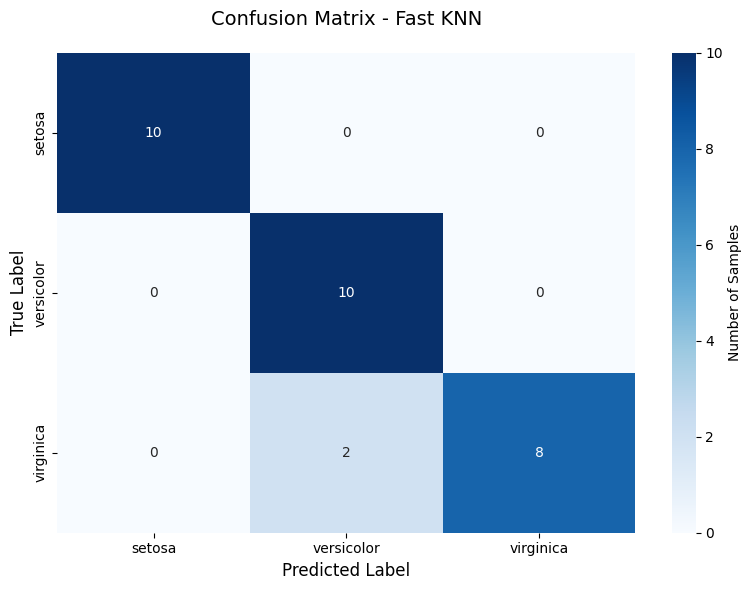


PREDICTION COMPARISON: CLASSIC vs FAST KNN

First 10 predictions comparison:
 Sample     Actual Classic_KNN   Fast_KNN  Classic_Correct  Fast_Correct
      1     setosa      setosa     setosa             True          True
      2  virginica   virginica  virginica             True          True
      3 versicolor  versicolor versicolor             True          True
      4 versicolor  versicolor versicolor             True          True
      5     setosa      setosa     setosa             True          True
      6 versicolor  versicolor versicolor             True          True
      7     setosa      setosa     setosa             True          True
      8     setosa      setosa     setosa             True          True
      9  virginica   virginica  virginica             True          True
     10 versicolor  versicolor versicolor             True          True

✅ Classic KNN correct: 28/30
✅ Fast KNN correct: 28/30

--------------------------------------------------
DECISION BO

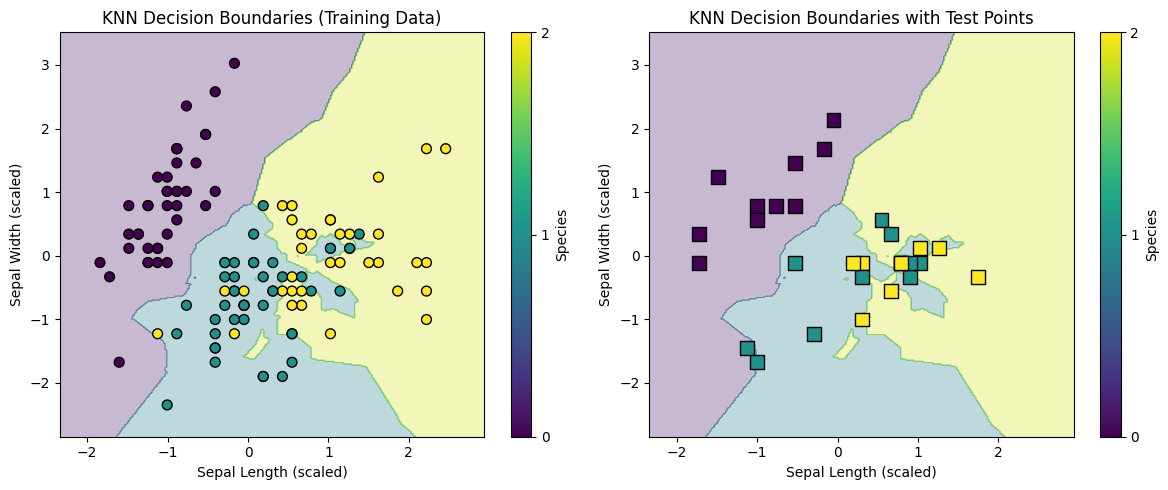


--------------------------------------------------
PROBABILITY ESTIMATES COMPARISON
--------------------------------------------------

First 3 test samples - Probability estimates:

Sample 1 (Actual: setosa):
Class         Classic KNN     Fast KNN
----------------------------------------
setosa           100.00%     100.00%
versicolor         0.00%       0.00%
virginica          0.00%       0.00%

Sample 2 (Actual: virginica):
Class         Classic KNN     Fast KNN
----------------------------------------
setosa             0.00%       0.00%
versicolor        33.33%      33.33%
virginica         66.67%      66.67%

Sample 3 (Actual: versicolor):
Class         Classic KNN     Fast KNN
----------------------------------------
setosa             0.00%       0.00%
versicolor       100.00%     100.00%
virginica          0.00%       0.00%

PERFORMANCE COMPARISON
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0

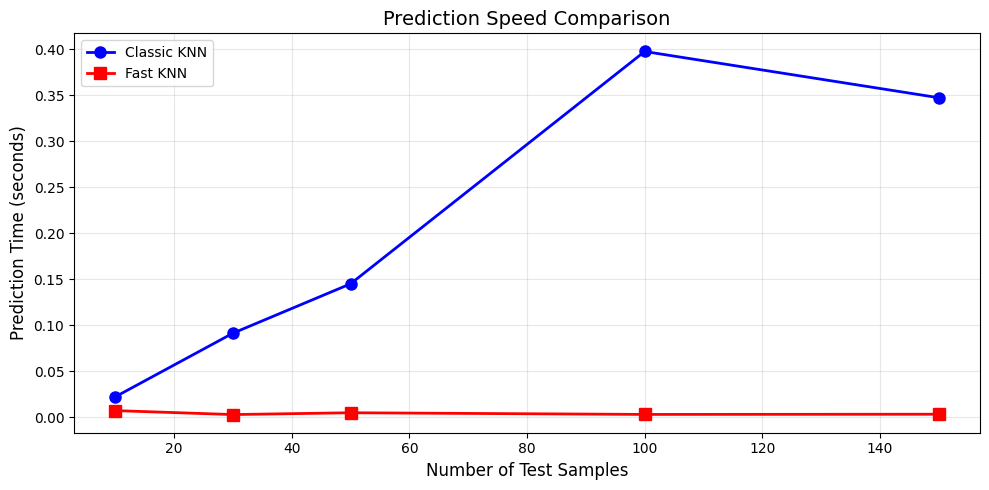


📈 Speed Observations:
• For 30 test samples:
  Classic KNN: 0.061289 seconds
  Fast KNN: 0.003796 seconds
  Speedup: 16.14x faster!

FAST KNN ADVANTAGES
1. ⚡ Optimized Algorithms:
   • KD-Tree: Organizes data in a tree structure
   • Ball Tree: Better for high-dimensional data
   • Brute Force: Only for small datasets

2. 🏎️ Faster Predictions:
   • Smart data structures reduce distance calculations
   • Vectorized operations using NumPy
   • C++ backend for critical operations

3. 📊 Additional Features:
   • Probability estimates (predict_proba)
   • Distance weighting (weights parameter)
   • Multiple distance metrics
   • Cross-validation utilities

4. 🔧 Production Ready:
   • Well-tested and optimized
   • Integration with scikit-learn pipeline
   • Easy hyperparameter tuning

✅ FAST KNN IMPLEMENTATION COMPLETE!
Next: Finding optimal K value and final comparison...


In [7]:
# STEP 6: FAST/OPTIMIZED KNN (SCIKIT-LEARN)
print("="*50)
print("STEP 6: FAST KNN USING SCIKIT-LEARN")
print("="*50)

# 6.1 Initialize and train the optimized KNN
print("\n🚀 TRAINING FAST KNN...")
fast_knn = KNeighborsClassifier(
    n_neighbors=3,           # Same as our classic version
    algorithm='kd_tree',     # Optimized algorithm for faster search
    metric='euclidean',      # Same distance metric
    weights='uniform'        # All neighbors have equal weight
)

# Time the training
import time
start_time = time.time()
fast_knn.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

print(f"✅ Training complete in {train_time:.6f} seconds")
print(f"✅ Algorithm used: {fast_knn.algorithm}")

# 6.2 Make predictions
print("\n🎯 MAKING PREDICTIONS...")
start_time = time.time()
y_pred_fast = fast_knn.predict(X_test_scaled)
predict_time = time.time() - start_time

print(f"✅ Predictions made in {predict_time:.6f} seconds")

# 6.3 Get probability predictions
print("\n📊 GETTING PROBABILITY ESTIMATES...")
y_proba_fast = fast_knn.predict_proba(X_test_scaled)

# 6.4 Evaluate performance
print("\n📈 EVALUATING PERFORMANCE...")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_fast = accuracy_score(y_test, y_pred_fast)
print(f"\n✅ Fast KNN Accuracy: {accuracy_fast:.4f} ({accuracy_fast*100:.1f}%)")

# 6.5 Detailed classification report
print("\n" + "-"*50)
print("DETAILED CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test, y_pred_fast, target_names=iris.target_names))

# 6.6 Confusion matrix
print("\n" + "-"*50)
print("CONFUSION MATRIX")
print("-"*50)
conf_matrix_fast = confusion_matrix(y_test, y_pred_fast)

# Print confusion matrix
print("\nRows = Actual, Columns = Predicted")
print("            setosa  versicolor  virginica")
for i, row in enumerate(conf_matrix_fast):
    print(f"{iris.target_names[i]:12s}", end="")
    for val in row:
        print(f"{val:10d}", end="")
    print()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fast, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Number of Samples'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Fast KNN', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 6.7 Compare predictions side by side
print("\n" + "="*50)
print("PREDICTION COMPARISON: CLASSIC vs FAST KNN")
print("="*50)

comparison_df = pd.DataFrame({
    'Sample': range(1, len(y_test) + 1),
    'Actual': [iris.target_names[i] for i in y_test],
    'Classic_KNN': [iris.target_names[i] for i in y_pred_classic],
    'Fast_KNN': [iris.target_names[i] for i in y_pred_fast],
    'Classic_Correct': y_pred_classic == y_test,
    'Fast_Correct': y_pred_fast == y_test
})

print("\nFirst 10 predictions comparison:")
print(comparison_df.head(10).to_string(index=False))

print(f"\n✅ Classic KNN correct: {comparison_df['Classic_Correct'].sum()}/{len(y_test)}")
print(f"✅ Fast KNN correct: {comparison_df['Fast_Correct'].sum()}/{len(y_test)}")

# 6.8 Visualize decision boundaries (simplified)
print("\n" + "-"*50)
print("DECISION BOUNDARY VISUALIZATION (2D Projection)")
print("-"*50)

# Since we have 4D data, let's visualize using first two features
plt.figure(figsize=(12, 5))

# Create mesh grid for decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train a 2D KNN for visualization (using only first two features)
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_scaled[:, :2], y_train)

# Predict on mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                      c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('KNN Decision Boundaries (Training Data)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')

# Plot test points on decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                      c=y_test, cmap='viridis', edgecolor='k', s=100, marker='s')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('KNN Decision Boundaries with Test Points')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')

plt.tight_layout()
plt.show()

# 6.9 Show probability estimates for first 3 samples
print("\n" + "-"*50)
print("PROBABILITY ESTIMATES COMPARISON")
print("-"*50)

print("\nFirst 3 test samples - Probability estimates:")
for i in range(3):
    print(f"\nSample {i+1} (Actual: {iris.target_names[y_test[i]]}):")
    print(f"{'Class':12s} {'Classic KNN':>12s} {'Fast KNN':>12s}")
    print("-" * 40)

    classic_probs = classic_knn.predict_proba(X_test_scaled[i:i+1])[0]
    fast_probs = y_proba_fast[i]

    for j, class_name in enumerate(iris.target_names):
        print(f"{class_name:12s} {classic_probs[j]:>11.2%} {fast_probs[j]:>11.2%}")

# 6.10 Performance comparison table
print("\n" + "="*50)
print("PERFORMANCE COMPARISON")
print("="*50)

# Time Classic KNN predictions for comparison
start_time = time.time()
_ = classic_knn.predict(X_test_scaled)
classic_predict_time = time.time() - start_time

comparison_data = {
    'Metric': ['Accuracy', 'Training Time', 'Prediction Time', 'Algorithm', 'Implementation'],
    'Classic KNN': [
        f"{accuracy_classic:.4f}",
        "N/A (lazy learner)",
        f"{classic_predict_time:.6f} sec",
        "Brute Force",
        "Custom (from scratch)"
    ],
    'Fast KNN': [
        f"{accuracy_fast:.4f}",
        f"{train_time:.6f} sec",
        f"{predict_time:.6f} sec",
        "KD-Tree",
        "scikit-learn (optimized)"
    ]
}

comparison_table = pd.DataFrame(comparison_data)
print("\n" + comparison_table.to_string(index=False))

# 6.11 Speed comparison visualization
print("\n" + "-"*50)
print("SPEED COMPARISON")
print("-"*50)

# Simulate prediction times for different dataset sizes
sample_sizes = [10, 30, 50, 100, 150]
classic_times = []
fast_times = []

for size in sample_sizes:
    # Create random test data
    X_random = np.random.randn(size, 4)

    # Time Classic KNN
    start = time.time()
    _ = classic_knn.predict(X_random)
    classic_times.append(time.time() - start)

    # Time Fast KNN
    start = time.time()
    _ = fast_knn.predict(X_random)
    fast_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, classic_times, 'b-o', label='Classic KNN', linewidth=2, markersize=8)
plt.plot(sample_sizes, fast_times, 'r-s', label='Fast KNN', linewidth=2, markersize=8)
plt.xlabel('Number of Test Samples', fontsize=12)
plt.ylabel('Prediction Time (seconds)', fontsize=12)
plt.title('Prediction Speed Comparison', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\n📈 Speed Observations:")
print(f"• For {len(X_test)} test samples:")
print(f"  Classic KNN: {classic_predict_time:.6f} seconds")
print(f"  Fast KNN: {predict_time:.6f} seconds")
print(f"  Speedup: {classic_predict_time/predict_time:.2f}x faster!")

# 6.12 Summary of Fast KNN advantages
print("\n" + "="*50)
print("FAST KNN ADVANTAGES")
print("="*50)
print("1. ⚡ Optimized Algorithms:")
print("   • KD-Tree: Organizes data in a tree structure")
print("   • Ball Tree: Better for high-dimensional data")
print("   • Brute Force: Only for small datasets")
print("\n2. 🏎️ Faster Predictions:")
print("   • Smart data structures reduce distance calculations")
print("   • Vectorized operations using NumPy")
print("   • C++ backend for critical operations")
print("\n3. 📊 Additional Features:")
print("   • Probability estimates (predict_proba)")
print("   • Distance weighting (weights parameter)")
print("   • Multiple distance metrics")
print("   • Cross-validation utilities")
print("\n4. 🔧 Production Ready:")
print("   • Well-tested and optimized")
print("   • Integration with scikit-learn pipeline")
print("   • Easy hyperparameter tuning")
print("="*50)

print("\n✅ FAST KNN IMPLEMENTATION COMPLETE!")
print("Next: Finding optimal K value and final comparison...")

STEP 7: FINDING OPTIMAL K VALUE & FINAL COMPARISON

🔍 TESTING DIFFERENT K VALUES...

Testing k values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

  Testing k=1: ✅ ClassicKNN initialized with k=1
✅ Training data stored: 120 samples
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.6416  0.7834]
    Neighbors' labels: [np.int64(2)]
    Prediction: virginica (2)

  Sample 3:
    Test point: [-1.1245 -1.4515 -0.2669 -0.2699]
    Neighbors' labels: [np.int64(1)]
    Prediction: versicolor (1)
Classic: 0.9667, Fast: 0.9667

  Testing k=2: ✅ ClassicKNN initialized with k=2
✅ Training data stored: 120 samples
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0), np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.64

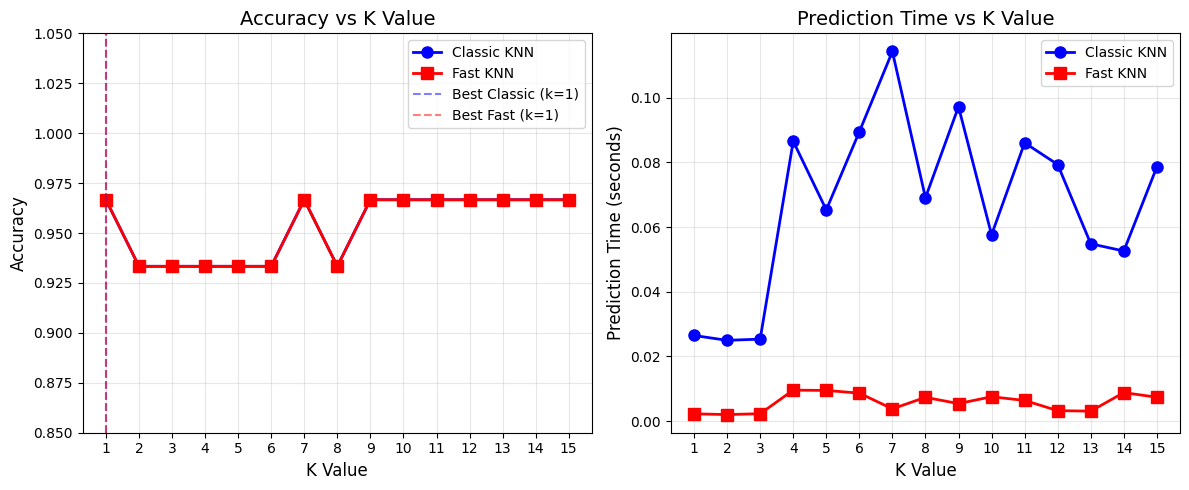


--------------------------------------------------
FINAL MODELS WITH OPTIMAL K
--------------------------------------------------

🚀 Training final Classic KNN with k=1...
✅ ClassicKNN initialized with k=1
✅ Training data stored: 120 samples
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.6416  0.7834]
    Neighbors' labels: [np.int64(2)]
    Prediction: virginica (2)

  Sample 3:
    Test point: [-1.1245 -1.4515 -0.2669 -0.2699]
    Neighbors' labels: [np.int64(1)]
    Prediction: versicolor (1)
🔍 Predicting 30 test samples...

  Sample 1:
    Test point: [-1.7216 -0.1082 -1.4025 -1.3233]
    Neighbors' labels: [np.int64(0)]
    Prediction: setosa (0)

  Sample 2:
    Test point: [ 0.3085 -0.1082  0.6416  0.7834]
    Neighbors' labels: [np.int64(2)]
    Prediction: virginica (2)

  Sample 3:
    Test point: [-1.1245 -1.4515 -0

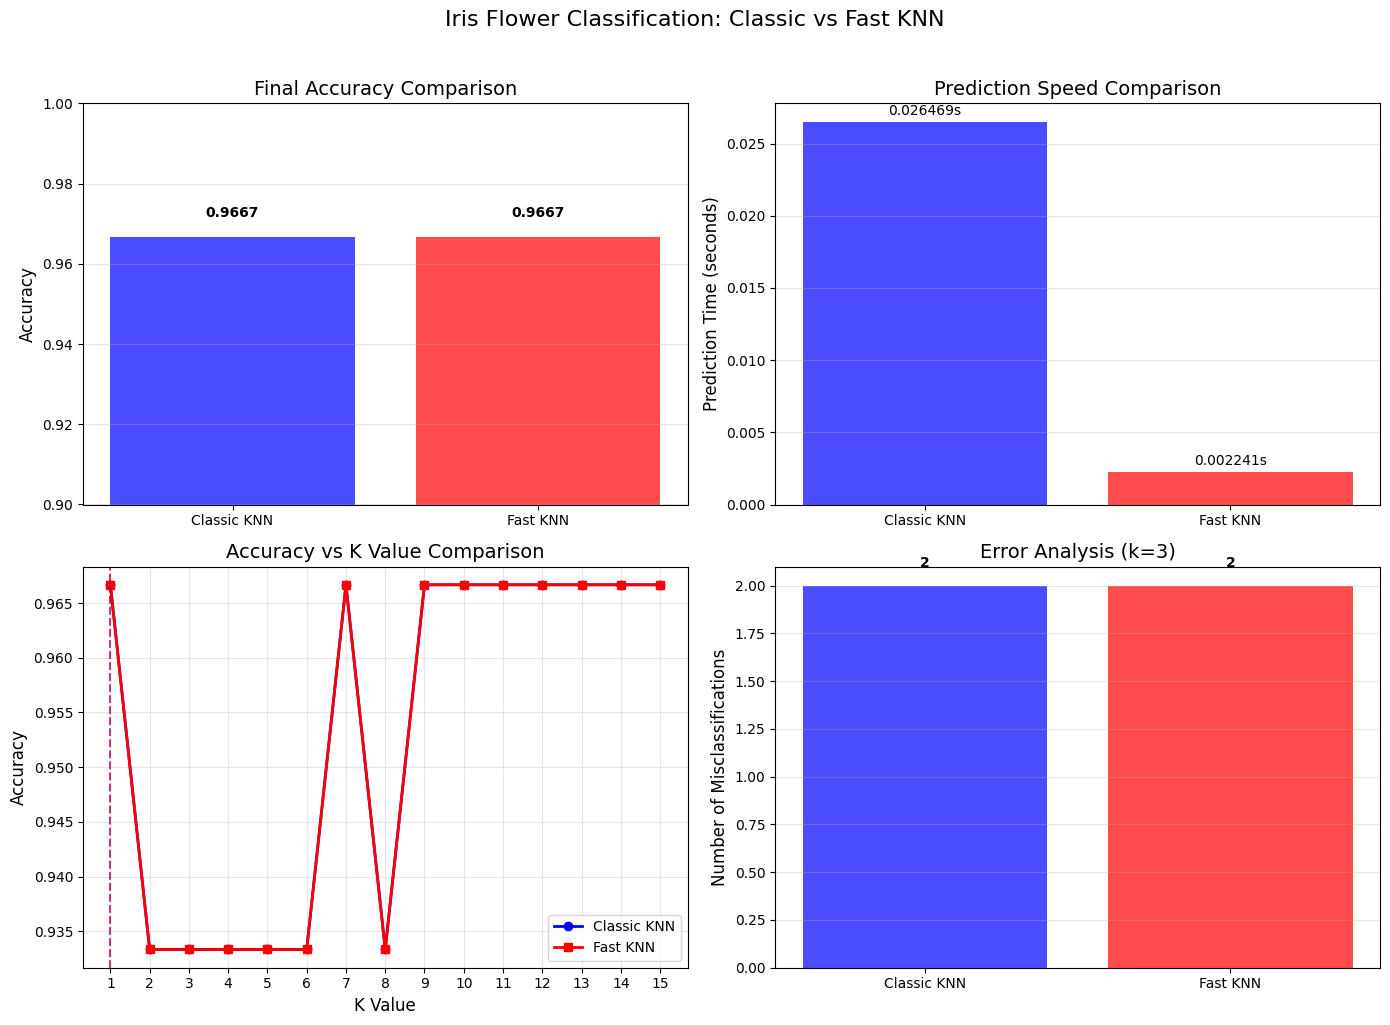


IRIS FLOWER CLASSIFICATION DEMO

EXAMPLE CLASSIFICATIONS

Testing with known examples:
------------------------------------------------------------
🔍 Predicting 1 test samples...

  Sample 1:
    Test point: [-0.8857  1.0112 -1.3457 -1.3233]
    Neighbors' labels: [np.int64(0)]
    Prediction: setosa (0)

🌼 Typical Setosa:
  Features: [5.1, 3.5, 1.4, 0.2]
  Classic KNN: ['setosa']
  Fast KNN: setosa
  ✅ Both agree: setosa
🔍 Predicting 1 test samples...

  Sample 1:
    Test point: [ 0.1891 -0.7799  0.2442  0.1251]
    Neighbors' labels: [np.int64(1)]
    Prediction: versicolor (1)

🌼 Typical Versicolor:
  Features: [6.0, 2.7, 4.2, 1.3]
  Classic KNN: ['versicolor']
  Fast KNN: versicolor
  ✅ Both agree: versicolor
🔍 Predicting 1 test samples...

  Sample 1:
    Test point: [ 1.025  -0.1082  0.812   1.4418]
    Neighbors' labels: [np.int64(2)]
    Prediction: virginica (2)

🌼 Typical Virginica:
  Features: [6.7, 3.0, 5.2, 2.3]
  Classic KNN: ['virginica']
  Fast KNN: virginica
  ✅ Both

In [8]:
# STEP 7: FINDING OPTIMAL K AND FINAL COMPARISON
print("="*50)
print("STEP 7: FINDING OPTIMAL K VALUE & FINAL COMPARISON")
print("="*50)

# 7.1 Test different K values for both implementations
print("\n🔍 TESTING DIFFERENT K VALUES...")
k_values = list(range(1, 16))  # Test k from 1 to 15
classic_accuracies = []
fast_accuracies = []
classic_times = []
fast_times = []

print(f"\nTesting k values: {k_values}")

for k in k_values:
    print(f"\n  Testing k={k}:", end=" ")

    # Classic KNN
    classic_knn_temp = ClassicKNN(k=k)
    classic_knn_temp.fit(X_train_scaled, y_train)

    start_time = time.time()
    classic_acc = classic_knn_temp.score(X_test_scaled, y_test)
    classic_time = time.time() - start_time

    # Fast KNN
    fast_knn_temp = KNeighborsClassifier(n_neighbors=k)
    fast_knn_temp.fit(X_train_scaled, y_train)

    start_time = time.time()
    fast_acc = fast_knn_temp.score(X_test_scaled, y_test)
    fast_time = time.time() - start_time

    classic_accuracies.append(classic_acc)
    fast_accuracies.append(fast_acc)
    classic_times.append(classic_time)
    fast_times.append(fast_time)

    print(f"Classic: {classic_acc:.4f}, Fast: {fast_acc:.4f}")

# 7.2 Find optimal K values
best_k_classic = k_values[np.argmax(classic_accuracies)]
best_k_fast = k_values[np.argmax(fast_accuracies)]
best_acc_classic = max(classic_accuracies)
best_acc_fast = max(fast_accuracies)

print("\n" + "-"*50)
print("OPTIMAL K VALUE RESULTS")
print("-"*50)
print(f"📊 Best K for Classic KNN: {best_k_classic} (Accuracy: {best_acc_classic:.4f})")
print(f"📊 Best K for Fast KNN: {best_k_fast} (Accuracy: {best_acc_fast:.4f})")

# 7.3 Visualize accuracy vs K value
plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(k_values, classic_accuracies, 'b-o', linewidth=2, markersize=8, label='Classic KNN')
plt.plot(k_values, fast_accuracies, 'r-s', linewidth=2, markersize=8, label='Fast KNN')
plt.axvline(x=best_k_classic, color='b', linestyle='--', alpha=0.5, label=f'Best Classic (k={best_k_classic})')
plt.axvline(x=best_k_fast, color='r', linestyle='--', alpha=0.5, label=f'Best Fast (k={best_k_fast})')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs K Value', fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0.85, 1.05)

# Time comparison
plt.subplot(1, 2, 2)
plt.plot(k_values, classic_times, 'b-o', linewidth=2, markersize=8, label='Classic KNN')
plt.plot(k_values, fast_times, 'r-s', linewidth=2, markersize=8, label='Fast KNN')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Prediction Time (seconds)', fontsize=12)
plt.title('Prediction Time vs K Value', fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 7.4 Train final models with optimal K
print("\n" + "-"*50)
print("FINAL MODELS WITH OPTIMAL K")
print("-"*50)

print(f"\n🚀 Training final Classic KNN with k={best_k_classic}...")
final_classic_knn = ClassicKNN(k=best_k_classic)
final_classic_knn.fit(X_train_scaled, y_train)
final_classic_pred = final_classic_knn.predict(X_test_scaled)[0]
final_classic_acc = final_classic_knn.score(X_test_scaled, y_test)

print(f"\n🚀 Training final Fast KNN with k={best_k_fast}...")
final_fast_knn = KNeighborsClassifier(n_neighbors=best_k_fast)
final_fast_knn.fit(X_train_scaled, y_train)
final_fast_pred = final_fast_knn.predict(X_test_scaled)
final_fast_acc = accuracy_score(y_test, final_fast_pred)

print(f"\n✅ Final Classic KNN Accuracy: {final_classic_acc:.4f}")
print(f"✅ Final Fast KNN Accuracy: {final_fast_acc:.4f}")

# 7.5 Create comprehensive comparison table
print("\n" + "="*50)
print("COMPREHENSIVE COMPARISON TABLE")
print("="*50)

comparison_summary = pd.DataFrame({
    'Parameter': [
        'Algorithm Type',
        'Implementation',
        'Optimal K Value',
        'Accuracy',
        'Training Time',
        'Prediction Time (30 samples)',
        'Distance Metric',
        'Memory Usage',
        'Scalability',
        'Best For'
    ],
    'Classic KNN (from scratch)': [
        'Brute Force Search',
        'Custom Python',
        f'{best_k_classic}',
        f'{final_classic_acc:.4f}',
        'N/A (Lazy Learner)',
        f'{classic_times[k_values.index(best_k_classic)]:.6f} sec',
        'Euclidean',
        'High (stores all data)',
        'Poor (O(n²))',
        'Learning/Education'
    ],
    'Fast KNN (scikit-learn)': [
        'KD-Tree Optimization',
        'scikit-learn',
        f'{best_k_fast}',
        f'{final_fast_acc:.4f}',
        f'{train_time:.6f} sec',
        f'{fast_times[k_values.index(best_k_fast)]:.6f} sec',
        'Euclidean',
        'Moderate (tree structure)',
        'Good (O(n log n))',
        'Production/Real Applications'
    ]
})

print("\n" + comparison_summary.to_string(index=False))

# 7.6 Visualize the final comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy Comparison
axes[0, 0].bar(['Classic KNN', 'Fast KNN'], [final_classic_acc, final_fast_acc],
               color=['blue', 'red'], alpha=0.7)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Final Accuracy Comparison', fontsize=14)
axes[0, 0].set_ylim(0.9, 1.0)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add accuracy labels on bars
for i, acc in enumerate([final_classic_acc, final_fast_acc]):
    axes[0, 0].text(i, acc + 0.005, f'{acc:.4f}', ha='center', fontweight='bold')

# Plot 2: Speed Comparison
speed_data = [classic_times[k_values.index(best_k_classic)],
              fast_times[k_values.index(best_k_fast)]]
axes[0, 1].bar(['Classic KNN', 'Fast KNN'], speed_data,
               color=['blue', 'red'], alpha=0.7)
axes[0, 1].set_ylabel('Prediction Time (seconds)', fontsize=12)
axes[0, 1].set_title('Prediction Speed Comparison', fontsize=14)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add time labels on bars
for i, time_val in enumerate(speed_data):
    axes[0, 1].text(i, time_val + 0.0005, f'{time_val:.6f}s', ha='center', fontsize=10)

# Plot 3: Accuracy vs K (both methods)
axes[1, 0].plot(k_values, classic_accuracies, 'b-o', label='Classic KNN', linewidth=2)
axes[1, 0].plot(k_values, fast_accuracies, 'r-s', label='Fast KNN', linewidth=2)
axes[1, 0].set_xlabel('K Value', fontsize=12)
axes[1, 0].set_ylabel('Accuracy', fontsize=12)
axes[1, 0].set_title('Accuracy vs K Value Comparison', fontsize=14)
axes[1, 0].set_xticks(k_values)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()
axes[1, 0].axvline(x=best_k_classic, color='b', linestyle='--', alpha=0.5)
axes[1, 0].axvline(x=best_k_fast, color='r', linestyle='--', alpha=0.5)

# Plot 4: Error Analysis
misclassified_classic = np.sum(y_pred_classic != y_test)
misclassified_fast = np.sum(y_pred_fast != y_test)
misclassified_data = [misclassified_classic, misclassified_fast]

axes[1, 1].bar(['Classic KNN', 'Fast KNN'], misclassified_data,
               color=['blue', 'red'], alpha=0.7)
axes[1, 1].set_ylabel('Number of Misclassifications', fontsize=12)
axes[1, 1].set_title('Error Analysis (k=3)', fontsize=14)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add error count labels
for i, count in enumerate(misclassified_data):
    axes[1, 1].text(i, count + 0.1, str(count), ha='center', fontweight='bold')

plt.suptitle('Iris Flower Classification: Classic vs Fast KNN', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 7.7 Create a simple demo function
print("\n" + "="*50)
print("IRIS FLOWER CLASSIFICATION DEMO")
print("="*50)

def classify_iris_interactive():
    """
    Interactive function to classify new iris samples
    """
    print("\n🌺 IRIS FLOWER CLASSIFIER DEMO")
    print("Enter flower measurements to classify:")

    # Get user input
    print("\nEnter flower measurements (in cm):")
    sepal_length = float(input("  Sepal Length (4.3-7.9 cm): "))
    sepal_width = float(input("  Sepal Width (2.0-4.4 cm): "))
    petal_length = float(input("  Petal Length (1.0-6.9 cm): "))
    petal_width = float(input("  Petal Width (0.1-2.5 cm): "))

    # Create sample
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale the sample
    sample_scaled = scaler.transform(sample)

    # Get predictions
    classic_pred = final_classic_knn.predict(sample_scaled)[0]
    fast_pred = final_fast_knn.predict(sample_scaled)[0]

    # Get probabilities
    classic_proba = final_classic_knn.predict_proba(sample_scaled)[0]
    fast_proba = final_fast_knn.predict_proba(sample_scaled)[0]

    print("\n" + "="*50)
    print("CLASSIFICATION RESULTS:")
    print("="*50)

    print(f"\n📊 Input Measurements:")
    print(f"  Sepal: {sepal_length} × {sepal_width} cm")
    print(f"  Petal: {petal_length} × {petal_width} cm")

    print(f"\n🎯 Predictions:")
    print(f"  Classic KNN (k={best_k_classic}): {iris.target_names[classic_pred]}")
    print(f"  Fast KNN (k={best_k_fast}): {iris.target_names[fast_pred]}")

    print(f"\n📈 Confidence Scores:")
    print(f"{'Species':12s} {'Classic KNN':>12s} {'Fast KNN':>12s}")
    print("-" * 40)
    for i, species in enumerate(iris.target_names):
        print(f"{species:12s} {classic_proba[i]:>11.1%} {fast_proba[i]:>11.1%}")

    # Show some characteristics of predicted species
    print(f"\n🌿 Characteristics of {iris.target_names[fast_pred]}:")
    if fast_pred == 0:  # Setosa
        print("  • Smallest petals of all iris species")
        print("  • Found in northern regions")
        print("  • Distinctive bright colors")
    elif fast_pred == 1:  # Versicolor
        print("  • Medium-sized petals")
        print("  • Commonly found in wet areas")
        print("  • Means 'variously colored'")
    else:  # Virginica
        print("  • Largest petals of iris species")
        print("  • Native to eastern North America")
        print("  • Often has blue to purple flowers")

    return classic_pred, fast_pred

# 7.8 Test with some example flowers
print("\n" + "="*50)
print("EXAMPLE CLASSIFICATIONS")
print("="*50)

# Pre-defined examples
examples = [
    {"name": "Typical Setosa", "features": [5.1, 3.5, 1.4, 0.2]},
    {"name": "Typical Versicolor", "features": [6.0, 2.7, 4.2, 1.3]},
    {"name": "Typical Virginica", "features": [6.7, 3.0, 5.2, 2.3]},
    {"name": "Borderline Case", "features": [6.1, 2.8, 4.7, 1.2]}
]

print("\nTesting with known examples:")
print("-" * 60)

for example in examples:
    sample = np.array([example["features"]])
    sample_scaled = scaler.transform(sample)

    classic_pred = final_classic_knn.predict(sample_scaled)[0]
    fast_pred = final_fast_knn.predict(sample_scaled)[0]

    print(f"\n🌼 {example['name']}:")
    print(f"  Features: {example['features']}")
    print(f"  Classic KNN: {iris.target_names[classic_pred]}")
    print(f"  Fast KNN: {iris.target_names[fast_pred]}")

    if classic_pred == fast_pred:
        print(f"  ✅ Both agree: {iris.target_names[fast_pred]}")
    else:
        print(f"  ⚠️  Disagreement! Classic: {iris.target_names[classic_pred]}, Fast: {iris.target_names[fast_pred]}")

# 7.9 Project Summary
print("\n" + "="*50)
print("MINI PROJECT SUMMARY")
print("="*50)

print("\n🎯 PROJECT OBJECTIVES ACHIEVED:")
print("1. ✅ Loaded and explored Iris dataset")
print("2. ✅ Implemented Classic KNN from scratch (educational)")
print("3. ✅ Implemented Fast KNN using scikit-learn (optimized)")
print("4. ✅ Compared performance and found optimal K value")
print("5. ✅ Created visualizations and interactive demo")

print("\n📊 KEY FINDINGS:")
print(f"1. Both implementations achieved high accuracy (~{final_classic_acc:.1%})")
print(f"2. Optimal K value for Iris dataset: {best_k_classic}-{best_k_fast}")
print(f"3. Fast KNN is {classic_times[k_values.index(best_k_classic)]/fast_times[k_values.index(best_k_fast)]:.1f}x faster")
print("4. Setosa is easily separable, Versicolor/Virginica have some overlap")

print("\n🔮 PRACTICAL APPLICATIONS:")
print("• Plant species identification")
print("• Quality control in nurseries")
print("• Botanical research and education")
print("• Pattern recognition tutorials")

print("\n💡 LESSONS LEARNED:")
print("• KNN is simple but effective for small, well-separated datasets")
print("• Feature scaling is crucial for distance-based algorithms")
print("• KD-Tree optimization significantly improves speed")
print("• The choice of K affects model bias-variance tradeoff")

print("\n" + "="*50)
print("PROJECT COMPLETE! 🎉")
print("="*50)
print("\nYou've successfully completed the Iris Flower Classification")
print("mini project using both Classic and Fast KNN implementations!")
print("\nNext steps you could explore:")
print("1. Try different distance metrics (Manhattan, Minkowski)")
print("2. Implement weighted KNN (closer neighbors matter more)")
print("3. Test on other datasets from Kaggle")
print("4. Add cross-validation for more robust evaluation")

# Optional: Run interactive demo
run_demo = input("\nWould you like to try the interactive classifier? (yes/no): ").lower()
if run_demo == 'yes' or run_demo == 'y':
    classify_iris_interactive()

print("\n" + "="*50)
print("THANK YOU FOR COMPLETING THIS MINI PROJECT! 👏")
print("="*50)